<a href="https://colab.research.google.com/github/mahsaalebakhtiari/Pathrise/blob/pathrise_notebook/PathriseP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding the Objective

The goal of this project is to predict how long it will take for a fellow to get placed at a company, based on features such as resume, interview performance, and participation level.

# Import dataset

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx


# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle


# Read the data

In [ ]:
df = pd.read_excel('Data_Pathrise.xlsx')


# Assess data
In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

# Clean Data


In [ ]:


df.columns = df.columns.str.strip()
print(df.columns.tolist())


['id', 'pathrise_status', 'primary_track', 'cohort_tag', 'program_duration_days', 'placed', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'number_of_interviews', 'number_of_applications', 'gender', 'race']


In [ ]:
df = df[df['program_duration_days'].notna()]
df = df[df['program_duration_days'] <= 356].reset_index(drop=True)
df = df[df['program_duration_days'] > 0].reset_index(drop=True)


In [ ]:
df['employment_status'] = df['employment_status'].replace({'Employed Full-Time' : 'Employed',
                                                           'Employed Part-Time' : 'Employed',
                                                           'Contractor' : 'Employed' })
df = df[df['employment_status'].notna()]



In [ ]:
df['highest_level_of_education'] = df['highest_level_of_education'].replace({'Doctorate or Professional Degree' : 'Doctorate Degree',
                                                                             'Some College, No Degree' : 'Some College',
                                                                             'High School Graduate' : 'High School or less',
                                                                             'GED or equivalent' : 'High School or less',
                                                                             'Some High School' : 'High School or less'})
df = df[df['highest_level_of_education'].notna()]

In [ ]:
df['length_of_job_search'] = df['length_of_job_search'].replace({'Less than one month' : 0.5,
                                                                 '1-2 months' : 1.5,
                                                                 '3-5 months' : 4,
                                                                 '6 months to a year' : 9,
                                                                 'Over a year' : 15}).astype(float)
df = df[df['length_of_job_search'].notna()]

<ipython-input-10-87b60b2cf8f5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['length_of_job_search'] = df['length_of_job_search'].replace({'Less than one month' : 0.5,


In [ ]:
df['primary_track'] = df['primary_track'].replace({'Web' : 'Other', 'Marketing' : 'Other'})

In [ ]:
df = df.dropna(subset=['professional_experience']).reset_index(drop=True)
df['professional_experience'] = df['professional_experience'].replace({'Less than one year' : 0.5,
                                                                       '1-2 years' : 1.5,
                                                                       '3-4 years' : 3.5,
                                                                       '5+ years' : 5 }).astype(float)

<ipython-input-12-1b4f1f26ab55>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['professional_experience'] = df['professional_experience'].replace({'Less than one year' : 0.5,


In [ ]:
df['work_authorization_status'] = df['work_authorization_status'].replace({'Canada Citizen' : 'Citizen',
                                                                           'F1 Visa/OPT' : 'Student Visa',
                                                                           'F1 Visa/CPT' : 'Student Visa',
                                                                           'STEM OPT' : 'Student Visa',
                                                                           'H1B' : 'Student Visa' })
df['work_authorization_status'] = df['work_authorization_status'].fillna('Unknown')

In [ ]:
df['number_of_interviews'] = df['number_of_interviews'].fillna(0)
df['number_of_interviews'] = df['number_of_interviews'].astype(int)

In [ ]:
df['gender'] = df['gender'].replace({'Non-Binary' : 'Other',
                                     'Decline to Self Identify' : 'Other' })
df['gender'] = df['gender'].fillna('Other')

In [ ]:
df['race'] = df['race'].replace({'East Asian or Asian American' : 'Asian',
                                 'South Asian or Indian American' : 'South Asian',
                                 'Non-Hispanic White or Euro-American' : 'White',
                                 'Latino or Hispanic American' : 'Hispanic',
                                 'Black, Afro-Caribbean, or African American' : 'Black',
                                 'Two or More Races' : 'Other',
                                 'Middle Eastern or Arab American' : 'Other',
                                 'Decline to Self Identify' : 'Other',
                                 'Native American or Alaskan Native' : 'Other'})
df['race'] = df['race'].fillna('Other')

In [ ]:
df['number_of_applications'] = df['number_of_applications'].astype(int)

In [ ]:
df['biggest_challenge_in_search'] = df['biggest_challenge_in_search'].replace({
    'Getting past phone screens': 'Interview Stages',
    'Getting past mid-stage interviews': 'Interview Stages',
    'Getting past final round interviews': 'Interview Stages',

    'Technical interviewing': 'Technical',
    'Technical skills': 'Technical',

    'Lack of relevant experience': 'Experience Gap',
    'Resume gap': 'Experience Gap',

    'Hearing back on my applications': 'Application Issues',
    'Figuring out which jobs to apply for': 'Unclear Focus',
    'Behavioral interviewing': 'Unclear Focus'
})

In [ ]:
df = df[df['biggest_challenge_in_search'].notna()]

In [ ]:
df = df[df['cohort_tag'].notna()].copy()
df['cohort_year'] = df['cohort_tag'].str.extract(r'(\d{2})')[0]
df['cohort_year'] = df['cohort_year'].astype(int)
df['cohort_year'] = 2000 + df['cohort_year']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 1277
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1258 non-null   int64  
 1   pathrise_status              1258 non-null   object 
 2   primary_track                1258 non-null   object 
 3   cohort_tag                   1258 non-null   object 
 4   program_duration_days        1258 non-null   float64
 5   placed                       1258 non-null   int64  
 6   employment_status            1258 non-null   object 
 7   highest_level_of_education   1258 non-null   object 
 8   length_of_job_search         1258 non-null   float64
 9   biggest_challenge_in_search  1258 non-null   object 
 10  professional_experience      1258 non-null   float64
 11  work_authorization_status    1258 non-null   object 
 12  number_of_interviews         1258 non-null   int64  
 13  number_of_applications 

In [ ]:
cleaned_df = df[['primary_track',
                 'cohort_year',
                 'program_duration_days',
                 'highest_level_of_education',
                 'length_of_job_search',
                 'biggest_challenge_in_search',
                 'professional_experience',
                 'work_authorization_status',
                 'number_of_interviews',
                 'number_of_applications',
                 'gender',
                 'race']]

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 1277
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1258 non-null   object 
 1   cohort_year                  1258 non-null   int64  
 2   program_duration_days        1258 non-null   float64
 3   highest_level_of_education   1258 non-null   object 
 4   length_of_job_search         1258 non-null   float64
 5   biggest_challenge_in_search  1258 non-null   object 
 6   professional_experience      1258 non-null   float64
 7   work_authorization_status    1258 non-null   object 
 8   number_of_interviews         1258 non-null   int64  
 9   number_of_applications       1258 non-null   int64  
 10  gender                       1258 non-null   object 
 11  race                         1258 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 127.8+ KB


In [ ]:
cleaned_df.to_csv('cleaned_df.csv')

# Exploratory Data Analysis (EDA)

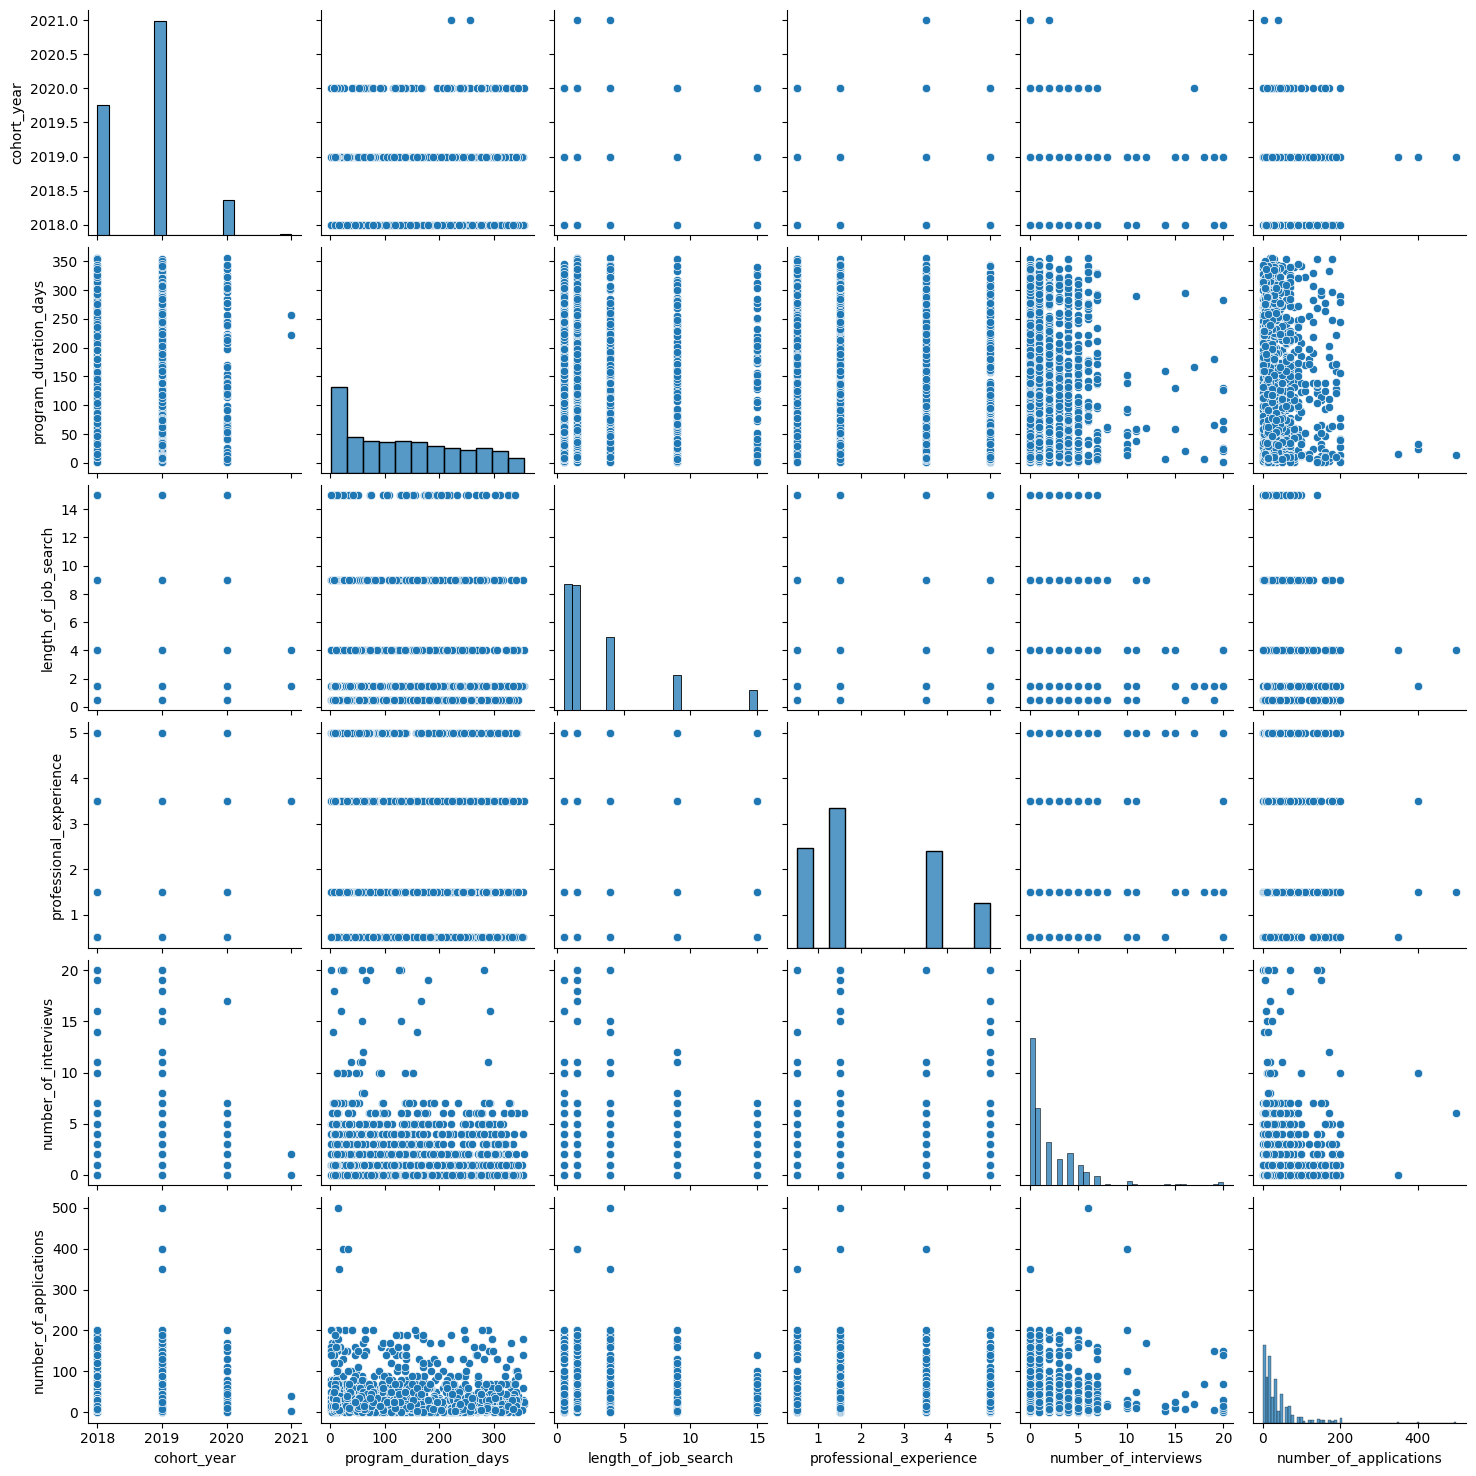

In [ ]:
sns.pairplot(cleaned_df)

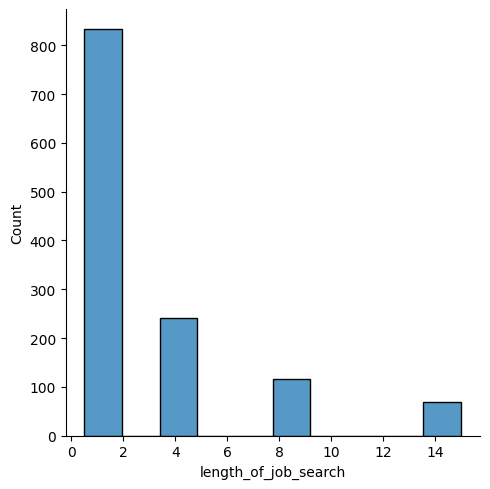

In [ ]:
sns.displot(x='length_of_job_search', data=cleaned_df, bins=10)

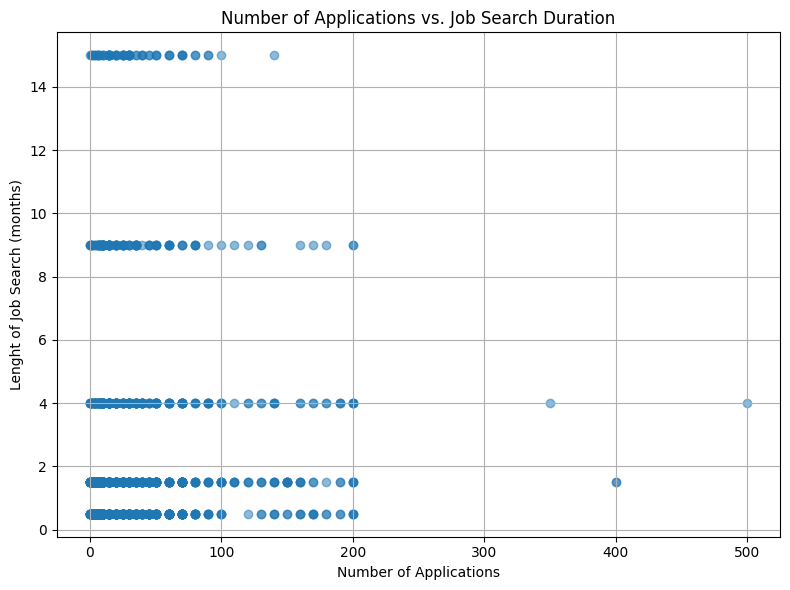

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['number_of_applications'], cleaned_df['length_of_job_search'], alpha=0.5)
plt.title('Number of Applications vs. Job Search Duration')
plt.xlabel('Number of Applications')
plt.ylabel('Lenght of Job Search (months)')
plt.grid(True)
plt.tight_layout()
plt.show()

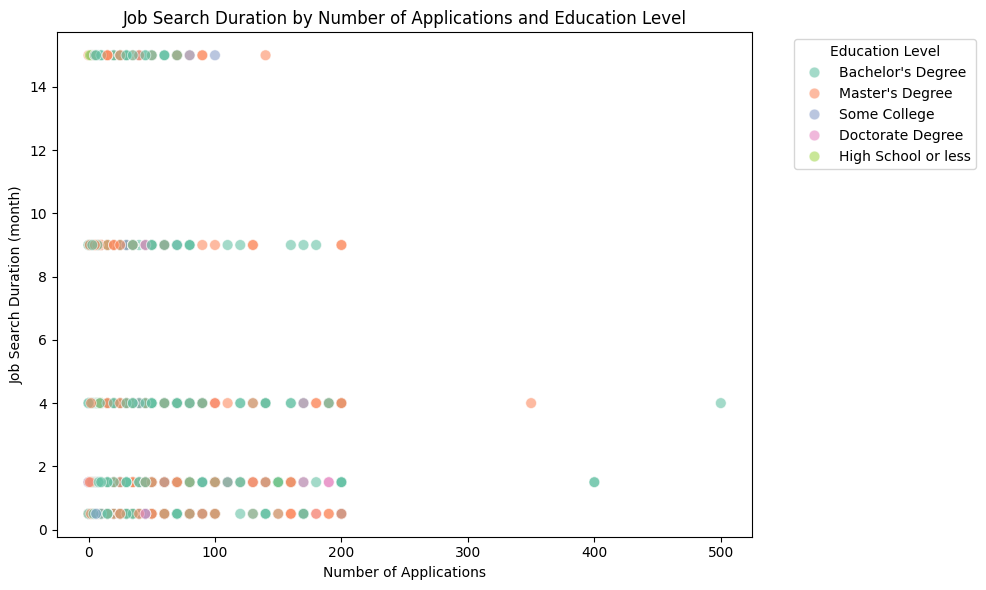

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= cleaned_df,
                x= 'number_of_applications',
                y= 'length_of_job_search',
                hue= 'highest_level_of_education',
                palette= 'Set2',
                alpha = 0.6,
                s= 60)
plt.title('Job Search Duration by Number of Applications and Education Level')
plt.xlabel('Number of Applications')
plt.ylabel('Job Search Duration (month)')
plt.legend(title = 'Education Level', bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.show()

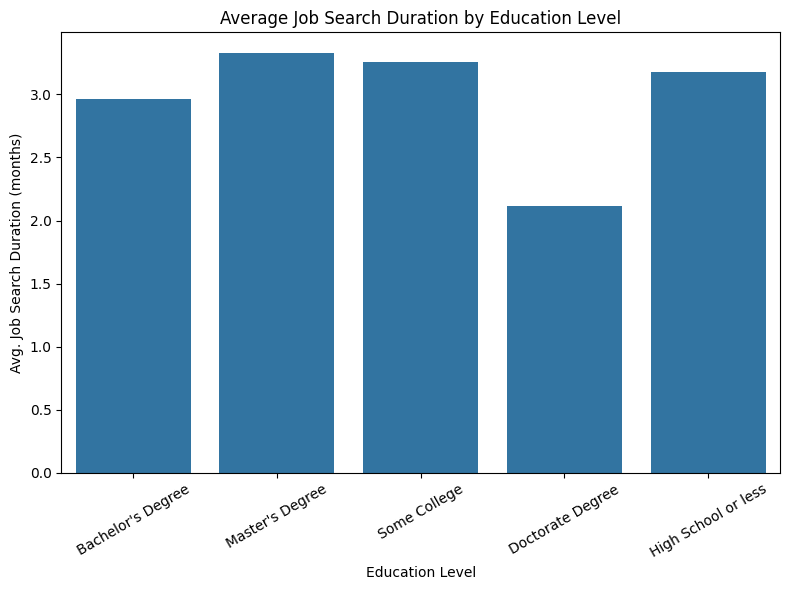

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=cleaned_df,
            x='highest_level_of_education',
            y='length_of_job_search',
            estimator='mean',
            errorbar=None )

plt.title('Average Job Search Duration by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Avg. Job Search Duration (months)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('bar_education_duration.png', dpi=300)
plt.show()

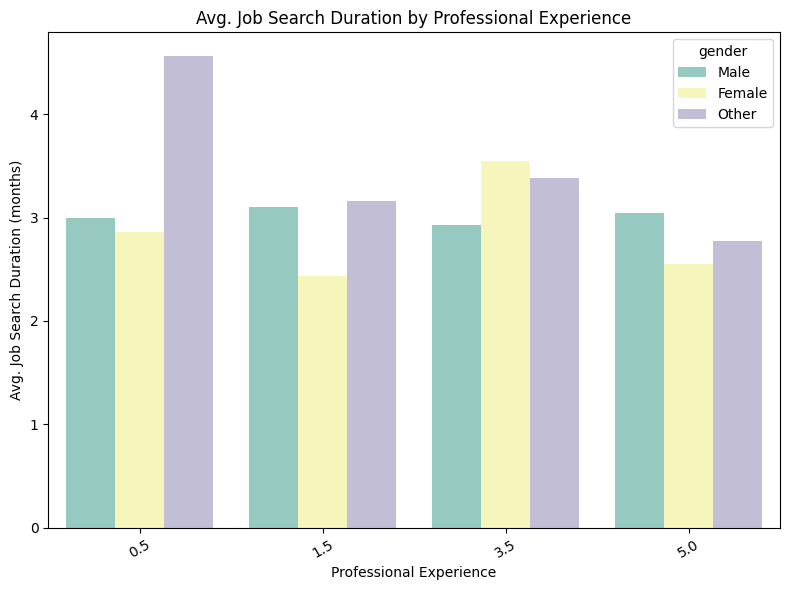

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df,
            x='professional_experience',
            y='length_of_job_search',
            hue='gender',
            estimator='mean',
            errorbar=None,
            palette='Set3')

plt.title('Avg. Job Search Duration by Professional Experience')
plt.xlabel('Professional Experience')
plt.ylabel('Avg. Job Search Duration (months)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('bar_experience_duration.png', dpi=300)
plt.show()

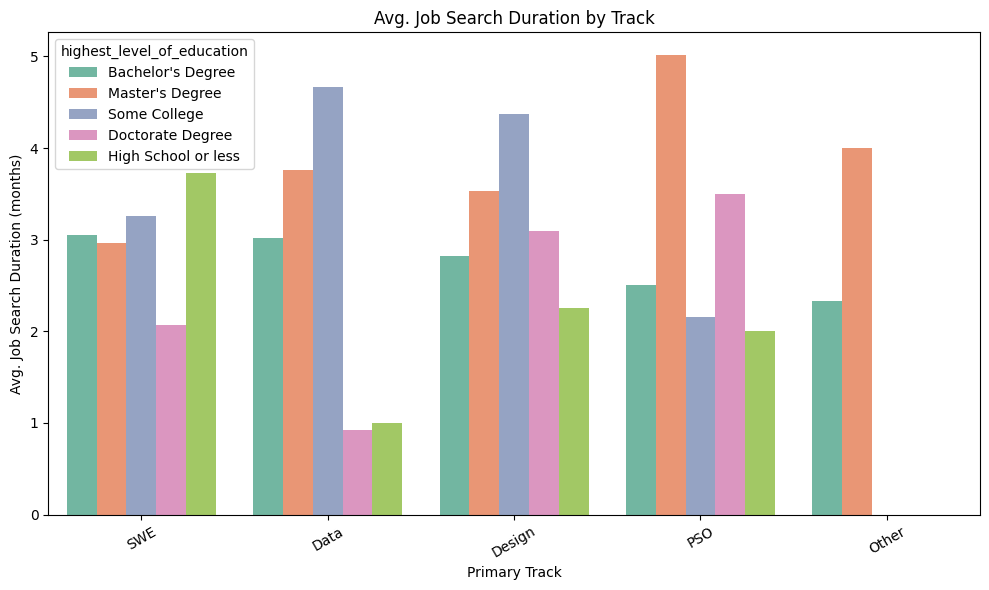

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            x='primary_track',
            y='length_of_job_search',
            hue='highest_level_of_education',
            estimator='mean',
            errorbar=None,
            palette='Set2')

plt.title('Avg. Job Search Duration by Track')
plt.xlabel('Primary Track')
plt.ylabel('Avg. Job Search Duration (months)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('bar_track_duration.png', dpi=300)
plt.show()

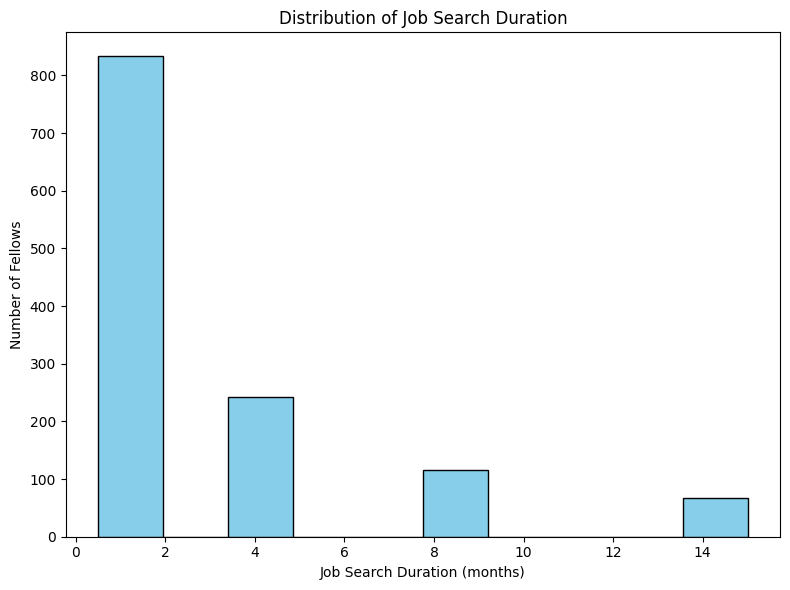

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['length_of_job_search'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Job Search Duration')
plt.xlabel('Job Search Duration (months)')
plt.ylabel('Number of Fellows')
plt.tight_layout()
plt.savefig('hist_jobsearch_duration.png', dpi=300)
plt.show()

# Feature Engineering

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 1277
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1258 non-null   object 
 1   cohort_year                  1258 non-null   int64  
 2   program_duration_days        1258 non-null   float64
 3   highest_level_of_education   1258 non-null   object 
 4   length_of_job_search         1258 non-null   float64
 5   biggest_challenge_in_search  1258 non-null   object 
 6   professional_experience      1258 non-null   float64
 7   work_authorization_status    1258 non-null   object 
 8   number_of_interviews         1258 non-null   int64  
 9   number_of_applications       1258 non-null   int64  
 10  gender                       1258 non-null   object 
 11  race                         1258 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 127.8+ KB


In [ ]:
preprocessed_df = pd.get_dummies(cleaned_df, columns= ['primary_track', 'highest_level_of_education', 'biggest_challenge_in_search', 'work_authorization_status','gender', 'race'])

In [ ]:
X = preprocessed_df.drop(columns=['length_of_job_search'])
y = preprocessed_df['length_of_job_search']

# Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([2.7524399 , 3.98460511, 2.23130058, 3.5243174 , 1.71353312,
       4.22502233, 3.62899497, 3.30672031, 3.35967933, 3.07031063,
       3.17263726, 3.64274402, 3.45896593, 2.93492234, 3.4309051 ,
       3.21840666, 3.5642458 , 4.41615327, 3.30322812, 3.19139254,
       2.99284935, 3.13166917, 3.81095902, 4.29986644, 2.21102587,
       3.74235491, 2.6240165 , 3.8062506 , 2.90205674, 2.38873839,
       2.42381539, 2.53229773, 3.99590903, 3.85292935, 2.53339676,
       2.72691228, 2.62231364, 2.51289896, 3.38474921, 2.72734782,
       3.49089524, 4.21156119, 3.87344076, 2.73325917, 4.4089029 ,
       3.97610541, 2.35300397, 3.2005977 , 3.52322687, 2.0462561 ,
       3.28145366, 3.18864753, 2.89557615, 2.4788863 , 3.09077517,
       2.17748503, 3.70687026, 2.0539198 , 2.83688679, 1.76428495,
       2.37269845, 2.80715885, 3.91939863, 3.00662412, 2.25803546,
       3.60975816, 2.19806394, 0.62459283, 2.70510676, 3.54290197,
       1.47374202, 3.16171251, 2.94813524, 3.45629382, 2.99606

<Axes: xlabel='length_of_job_search'>

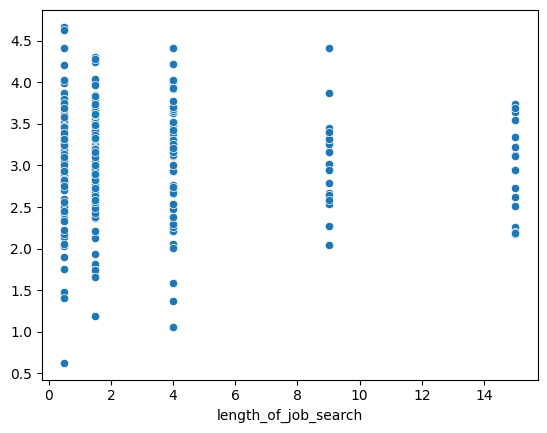

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 2.722174296231247


# Save the Model

In [ ]:
pickle.dump(model, open('Pathrise_prediction.pkl', 'wb'))